In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import pandas_profiling as pp

pd.set_option('display.max_columns', 500)

In [2]:
score_Data = pd.read_csv('./data/spreadspoke_scores.csv')

In [3]:
data_filtered = score_Data[score_Data.schedule_season>=2012]

In [4]:
pp.ProfileReport(data_filtered)

Number of variables,18
Number of observations,1869
Total Missing (%),8.4%
Total size in memory,237.4 KiB
Average record size in memory,130.0 B
Numeric,6
Categorical,9
Boolean,2
Date,0
Text (Unique),0
Rejected,1


In [5]:
data_filtered.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
10542,09/05/2012,2012,1,False,New York Giants,17,24,Dallas Cowboys,NYG,-4.0,46,MetLife Stadium,False,77.0,5.0,63,NaN
10543,09/09/2012,2012,1,False,Arizona Cardinals,20,16,Seattle Seahawks,SEA,-3.0,41,University of Phoenix Stadium,False,72.0,0.0,NaN,DOME
10544,09/09/2012,2012,1,False,Chicago Bears,41,21,Indianapolis Colts,CHI,-10.0,42.5,Soldier Field,False,70.0,11.0,66,NaN
10545,09/09/2012,2012,1,False,Cleveland Browns,16,17,Philadelphia Eagles,PHI,-9.5,42,FirstEnergy Stadium,False,68.0,9.0,57,NaN
10546,09/09/2012,2012,1,False,Denver Broncos,31,19,Pittsburgh Steelers,DEN,-2.0,45.5,Sports Authority Field at Mile High,False,85.0,9.0,12,NaN


In [6]:
data_filtered.columns

Index(['schedule_date', 'schedule_season', 'schedule_week', 'schedule_playoff',
       'team_home', 'score_home', 'score_away', 'team_away',
       'team_favorite_id', 'spread_favorite', 'over_under_line', 'stadium',
       'stadium_neutral', 'weather_temperature', 'weather_wind_mph',
       'weather_humidity', 'weather_detail'],
      dtype='object')

In [7]:
nfl_teams = pd.read_csv('data/nfl_teams.csv')
nfl_teams.head()

,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
1,Phoenix Cardinals,Cardinals,ARI,CRD,NFC,NaN,NFC,NFC East
2,St. Louis Cardinals,Cardinals,ARI,ARI,NFC,NaN,NFC,NFC East
3,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
4,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central


In [8]:
id_dict = nfl_teams.set_index('team_name')['team_id'].to_dict()

In [9]:
def over_under_result(x):
    if x['total_score'] > x['over_under_line']:
        return 'over'
    elif x['total_score'] == x['over_under_line']:
        return 'push'
    else:
        return 'under'

In [10]:
def calc_spread(x):
    if x.team_favorite_id == 'PICK':
        return x.score_home - x.score_away
    elif x.team_favorite_id == x.team_home_id:
        return x.score_away - x.score_home
    else:
        return x.score_home - x.score_away

In [11]:
def spread_result(x):
    if x.team_favorite_id == 'PICK':
        if x['actual_spread'] > x['spread_favorite']:
            return 'home'
        elif x['actual_spread'] == x['spread_favorite']:
            return 'push'
        else:
            return 'away'
    else:
        if x['actual_spread'] > x['spread_favorite']:
            return 'underdog'
        elif x['actual_spread'] == x['spread_favorite']:
            return 'push'
        else:
            return 'favorite'

In [12]:
def underdog_id(x):
    if x['team_favorite_id']=='PICK':
        return 'PICK'
    elif x['team_home_id']==x['team_favorite_id']:
        return x['team_away_id']
    else:
        return x['team_home_id']

In [13]:

data_filtered['schedule_date'] = pd.to_datetime(data_filtered['schedule_date'], format='%m/%d/%Y')

data_filtered['over_under_line'] = data_filtered['over_under_line'].astype(
    'float')
                                                        
data_filtered.loc[:, 'team_home_id'] = data_filtered.loc[:, 'team_home'].map(
    lambda x: id_dict[x])
data_filtered.loc[:, 'team_away_id'] = data_filtered.loc[:, 'team_away'].map(
    lambda x: id_dict[x])

data_filtered.loc[:, 'team_underdog_id'] = data_filtered.apply(underdog_id, axis=1)

data_filtered['total_score'] = data_filtered['score_home'] + \
    data_filtered['score_away']

data_filtered['over_under_result'] = data_filtered.apply(over_under_result, axis=1)

data_filtered['actual_spread'] = data_filtered.apply(calc_spread, axis=1)

data_filtered['spread_result'] = data_filtered.apply(spread_result, axis=1)

data_filtered.head()

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_home_id,team_away_id,team_underdog_id,total_score,over_under_result,actual_spread,spread_result
10542,2012-09-05,2012,1,False,New York Giants,17,24,Dallas Cowboys,NYG,-4.0,46.0,MetLife Stadium,False,77.0,5.0,63,NaN,NYG,DAL,DAL,41,under,7,underdog
10543,2012-09-09,2012,1,False,Arizona Cardinals,20,16,Seattle Seahawks,SEA,-3.0,41.0,University of Phoenix Stadium,False,72.0,0.0,NaN,DOME,ARI,SEA,ARI,36,under,4,underdog
10544,2012-09-09,2012,1,False,Chicago Bears,41,21,Indianapolis Colts,CHI,-10.0,42.5,Soldier Field,False,70.0,11.0,66,NaN,CHI,IND,IND,62,over,-20,favorite
10545,2012-09-09,2012,1,False,Cleveland Browns,16,17,Philadelphia Eagles,PHI,-9.5,42.0,FirstEnergy Stadium,False,68.0,9.0,57,NaN,CLE,PHI,CLE,33,under,-1,underdog
10546,2012-09-09,2012,1,False,Denver Broncos,31,19,Pittsburgh Steelers,DEN,-2.0,45.5,Sports Authority Field at Mile High,False,85.0,9.0,12,NaN,DEN,PIT,PIT,50,over,-12,favorite


In [14]:
data_filtered.spread_result.value_counts(1)

underdog    0.495987
favorite    0.467630
push        0.030498
away        0.003210
home        0.002675
Name: spread_result, dtype: float64

In [15]:
print(data_filtered.spread_result.value_counts(1))
print('\n')
print(data_filtered.over_under_result.value_counts(1))

underdog    0.495987
favorite    0.467630
push        0.030498
away        0.003210
home        0.002675
Name: spread_result, dtype: float64


under    0.506688
over     0.478331
push     0.014981
Name: over_under_result, dtype: float64


In [16]:
print(list(data_filtered.columns))

['schedule_date', 'schedule_season', 'schedule_week', 'schedule_playoff', 'team_home', 'score_home', 'score_away', 'team_away', 'team_favorite_id', 'spread_favorite', 'over_under_line', 'stadium', 'stadium_neutral', 'weather_temperature', 'weather_wind_mph', 'weather_humidity', 'weather_detail', 'team_home_id', 'team_away_id', 'team_underdog_id', 'total_score', 'over_under_result', 'actual_spread', 'spread_result']


In [17]:
predictive_features = ['schedule_date', 'schedule_season', 'schedule_week', 
                       'schedule_playoff','team_home_id', 'team_away_id', 
                       'team_favorite_id', 'spread_favorite', 'over_under_line',
                       'stadium', 'stadium_neutral', 'weather_temperature', 
                       'weather_wind_mph', 'weather_humidity', 'weather_detail', 'team_underdog_id']

In [18]:
X = data_filtered[predictive_features]

In [19]:
X.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home_id,team_away_id,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_underdog_id
10542,2012-09-05,2012,1,False,NYG,DAL,NYG,-4.0,46.0,MetLife Stadium,False,77.0,5.0,63,NaN,DAL
10543,2012-09-09,2012,1,False,ARI,SEA,SEA,-3.0,41.0,University of Phoenix Stadium,False,72.0,0.0,NaN,DOME,ARI
10544,2012-09-09,2012,1,False,CHI,IND,CHI,-10.0,42.5,Soldier Field,False,70.0,11.0,66,NaN,IND
10545,2012-09-09,2012,1,False,CLE,PHI,PHI,-9.5,42.0,FirstEnergy Stadium,False,68.0,9.0,57,NaN,CLE
10546,2012-09-09,2012,1,False,DEN,PIT,DEN,-2.0,45.5,Sports Authority Field at Mile High,False,85.0,9.0,12,NaN,PIT


In [20]:
X.dtypes

schedule_date          datetime64[ns]
schedule_season                 int64
schedule_week                  object
schedule_playoff                 bool
team_home_id                   object
team_away_id                   object
team_favorite_id               object
spread_favorite               float64
over_under_line               float64
stadium                        object
stadium_neutral                  bool
weather_temperature           float64
weather_wind_mph              float64
weather_humidity               object
weather_detail                 object
team_underdog_id               object
dtype: object

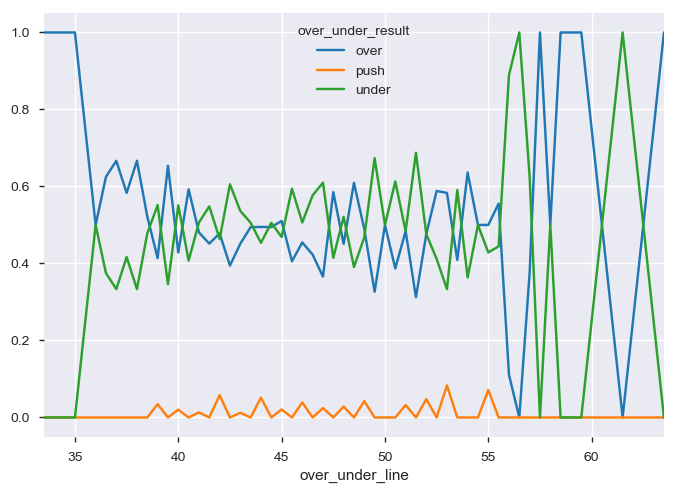

In [21]:
ct = pd.crosstab(data_filtered.over_under_line, data_filtered.over_under_result) #.plot();
ct.div(np.sum(ct, axis=1), axis=0).plot();

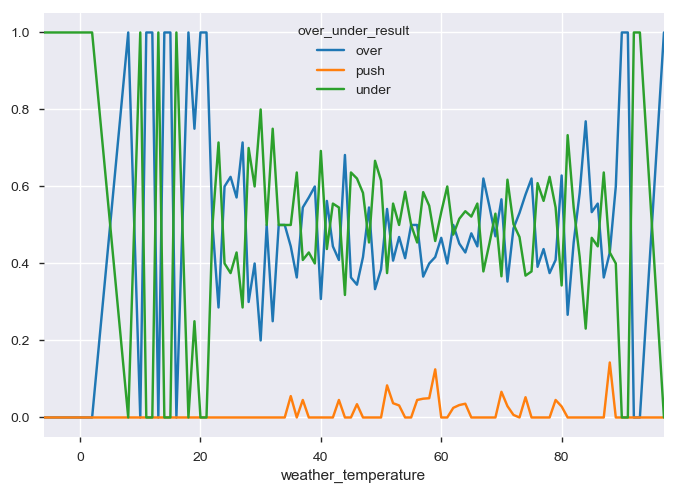

In [22]:
ct = pd.crosstab(data_filtered.weather_temperature, data_filtered.over_under_result) #.plot();
ct.div(np.sum(ct, axis=1), axis=0).plot();

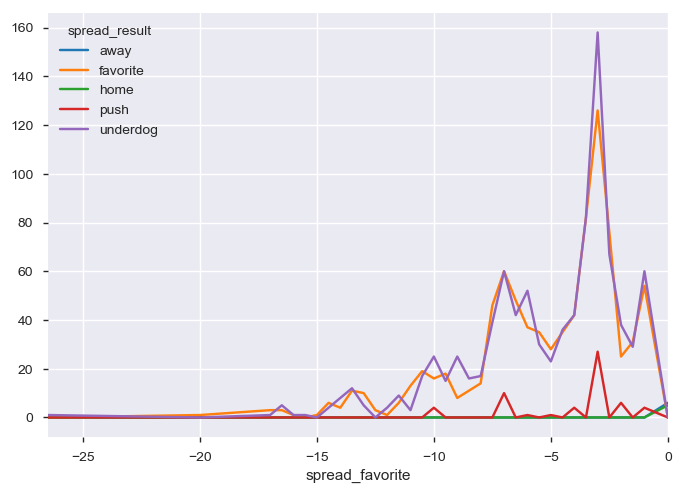

In [23]:
pd.crosstab(data_filtered.spread_favorite, data_filtered.spread_result).plot();

In [24]:
import plotly.offline as pl


In [25]:
import cufflinks as cf
cf.go_offline()

In [26]:
pd.crosstab(data_filtered.spread_result, data_filtered.team_favorite_id).iplot()

In [27]:
ct = pd.crosstab(data_filtered.spread_result, data_filtered.team_favorite_id)
ct.T.div(ct.sum(), axis=0).iplot(title='Spread Result by Favorite Team')

In [28]:
ct = pd.crosstab(data_filtered.spread_result, data_filtered.team_underdog_id)
ct.T.div(ct.sum(), axis=0).iplot(title='Spread Result by Underdog Team')

In [29]:
data_filtered[data_filtered.team_favorite_id=="PICK"].head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_home_id,team_away_id,team_underdog_id,total_score,over_under_result,actual_spread,spread_result
10632,2012-10-15,2012,6,False,San Diego Chargers,24,35,Denver Broncos,PICK,0.0,47.5,Qualcomm Stadium,False,78.0,7.0,50,NaN,LAC,DEN,PICK,59,over,-11,away
10752,2012-12-16,2012,15,False,Atlanta Falcons,34,0,New York Giants,PICK,0.0,50.0,Georgia Dome,False,72.0,0.0,NaN,DOME,ATL,NYG,PICK,34,under,34,home
10900,2013-10-14,2013,6,False,San Diego Chargers,19,9,Indianapolis Colts,PICK,0.0,50.5,Qualcomm Stadium,False,69.0,3.0,69,NaN,LAC,IND,PICK,28,under,10,home
10940,2013-11-03,2013,9,False,Washington Redskins,30,24,San Diego Chargers,PICK,0.0,48.5,FedEx Field,False,57.0,20.0,41,NaN,WAS,LAC,PICK,54,over,6,home
11380,2015-09-27,2015,3,False,Dallas Cowboys,28,39,Atlanta Falcons,PICK,0.0,43.5,Cowboys Stadium,False,72.0,0.0,NaN,DOME,DAL,ATL,PICK,67,over,-11,away


In [30]:
giantsgames = (data_filtered.team_away_id=='NYG') | (data_filtered.team_home_id=='NYG')
#season = data_filtered.schedule_season == 2018
weather = data_filtered.weather_detail=='Rain'

data_filtered[giantsgames & weather]

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_home_id,team_away_id,team_underdog_id,total_score,over_under_result,actual_spread,spread_result
10601,2012-09-30,2012,4,False,Philadelphia Eagles,19,17,New York Giants,PHI,-1.5,46.5,Lincoln Financial Field,False,63.0,8.0,59,Rain,PHI,NYG,NYG,36,under,-2,favorite
10743,2012-12-09,2012,14,False,New York Giants,52,27,New Orleans Saints,NYG,-4.5,51.5,MetLife Stadium,False,43.0,3.0,88,Rain,NYG,NO,NO,79,over,-25,favorite
10950,2013-11-10,2013,10,False,New York Giants,24,20,Oakland Raiders,NYG,-7.0,41.0,MetLife Stadium,False,53.0,14.0,71,Rain,NYG,OAK,OAK,44,over,-4,underdog
11220,2014-11-09,2014,10,False,Seattle Seahawks,38,17,New York Giants,SEA,-9.0,45.0,CenturyLink Field,False,56.0,0.0,NaN,Rain,SEA,NYG,NYG,55,over,-21,favorite
11938,2017-10-01,2017,4,False,Tampa Bay Buccaneers,25,23,New York Giants,TB,-3.0,44.5,Raymond James Stadium,False,82.0,11.0,NaN,Rain,TB,NYG,NYG,48,over,-2,underdog
12157,2018-09-09,2018,1,False,New York Giants,15,20,Jacksonville Jaguars,JAX,-2.5,43.0,MetLife Stadium,False,59.0,7.0,NaN,Rain,NYG,JAX,NYG,35,under,-5,favorite
12222,2018-10-11,2018,6,False,New York Giants,13,34,Philadelphia Eagles,PHI,-1.5,45.0,MetLife Stadium,False,70.0,3.0,NaN,Rain,NYG,PHI,NYG,47,over,-21,favorite
12364,2018-12-16,2018,15,False,New York Giants,0,17,Tennessee Titans,TEN,-2.5,42.0,MetLife Stadium,False,40.0,6.0,NaN,Rain,NYG,TEN,NYG,17,under,-17,favorite


In [31]:
data_filtered[data_filtered.weather_wind_mph.isna()]

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_home_id,team_away_id,team_underdog_id,total_score,over_under_result,actual_spread,spread_result
10798,2013-01-05,2012,Wildcard,True,Green Bay Packers,24,10,Minnesota Vikings,GB,-11.0,44.5,Lambeau Field,False,NaN,NaN,NaN,NaN,GB,MIN,MIN,34,under,-14,favorite
10799,2013-01-05,2012,Wildcard,True,Houston Texans,19,13,Cincinnati Bengals,HOU,-4.0,42.5,Reliant Stadium,False,NaN,NaN,NaN,NaN,HOU,CIN,CIN,32,under,-6,favorite
10800,2013-01-06,2012,Wildcard,True,Baltimore Ravens,24,9,Indianapolis Colts,BAL,-7.0,47.0,M&T Bank Stadium,False,NaN,NaN,NaN,NaN,BAL,IND,IND,33,under,-15,favorite
10801,2013-01-06,2012,Wildcard,True,Washington Redskins,14,24,Seattle Seahawks,SEA,-3.0,45.0,FedEx Field,False,NaN,NaN,NaN,NaN,WAS,SEA,WAS,38,under,-10,favorite
10802,2013-01-12,2012,Division,True,Denver Broncos,35,38,Baltimore Ravens,DEN,-9.0,44.5,Sports Authority Field at Mile High,False,NaN,NaN,NaN,NaN,DEN,BAL,BAL,73,over,3,underdog
10803,2013-01-12,2012,Division,True,San Francisco 49ers,45,31,Green Bay Packers,SF,-3.0,45.5,Candlestick Park,False,NaN,NaN,NaN,NaN,SF,GB,GB,76,over,-14,favorite
10805,2013-01-13,2012,Division,True,New England Patriots,41,28,Houston Texans,NE,-9.5,51.0,Gillette Stadium,False,NaN,NaN,NaN,NaN,NE,HOU,HOU,69,over,-13,favorite
10807,2013-01-20,2012,Conference,True,New England Patriots,13,28,Baltimore Ravens,NE,-7.5,51.5,Gillette Stadium,False,NaN,NaN,NaN,NaN,NE,BAL,BAL,41,under,15,underdog
11066,2014-01-04,2013,Wildcard,True,Philadelphia Eagles,24,26,New Orleans Saints,PHI,-3.0,53.0,Lincoln Financial Field,False,NaN,NaN,NaN,NaN,PHI,NO,NO,50,under,2,underdog
11067,2014-01-05,2013,Wildcard,True,Cincinnati Bengals,10,27,San Diego Chargers,CIN,-6.0,48.0,Paul Brown Stadium,False,NaN,NaN,NaN,NaN,CIN,LAC,LAC,37,under,17,underdog


In [32]:
logreg_data = data_filtered.copy()

In [33]:
nopickem = logreg_data.spread_favorite!=0
nopush = logreg_data.spread_result!='push'

logreg_data = logreg_data[nopickem & nopush]

In [34]:
from patsy import dmatrices
y_log, X_log = dmatrices('over_under_result ~ over_under_line + spread_favorite + C(team_favorite_id)  + C(team_underdog_id) + schedule_season', 
                         logreg_data, return_type = "dataframe")

In [35]:
import statsmodels.api as sm
logit_model = sm.Logit(y_log.iloc[:,0], X_log)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.679892
         Iterations 5


In [36]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              Logit Regression Results                             
===================================================================================
Dep. Variable:     over_under_result[over]   No. Observations:                 1801
Model:                               Logit   Df Residuals:                     1735
Method:                                MLE   Df Model:                           65
Date:                     Mon, 01 Jul 2019   Pseudo R-squ.:                 0.01747
Time:                             10:09:03   Log-Likelihood:                -1224.5
converged:                            True   LL-Null:                       -1246.3
                                             LLR p-value:                    0.9813
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     21.8249     50.502      0.432      0.666     -77.156     120.806
C(team_favorite_id)[T.ATL]     0.0475      0.380      0.125      0.900      -0.698       0.793
C(team_favorite_id)[T.BAL]     0.0219      0.386      0.057      0.955      -0.735       0.778
C(team_favorite_id)[T.BUF]     0.3927      0.436      0.900      0.368      -0.462       1.247
C(team_favorite_id)[T.CAR]     0.0298      0.380      0.078      0.938      -0.716       0.775
C(team_favorite_id)[T.CHI]     0.1304      0.421      0.310      0.757      -0.695       0.956
C(team_favorite_id)[T.CIN]    -0.2617      0.396     -0.661      0.508      -1.037       0.514
C(team_favorite_id)[T.CLE]    -0.3324      0.526     -0.632      0.527      -1.363       0.698
C(team_favorite_id)[T.DAL]     0.1369      0.385      0.356      0.722      -0.618       0.892
C(team_favorite_id)[T.DEN]     0.0649      0.368      0.176      0.860      -0.657       0.787
C(team_favorite_id)[T.DET]     0.3205      0.397      0.808      0.419      -0.457       1.098
C(team_favorite_id)[T.GB]      0.5289      0.371      1.424      0.154      -0.199       1.257
C(team_favorite_id)[T.HOU]    -0.1862      0.395     -0.472      0.637      -0.960       0.587
C(team_favorite_id)[T.IND]    -0.3370      0.409     -0.824      0.410      -1.139       0.465
C(team_favorite_id)[T.JAX]     0.0614      0.482      0.127      0.899      -0.883       1.006
C(team_favorite_id)[T.KC]     -0.3944      0.381     -1.034      0.301      -1.142       0.353
C(team_favorite_id)[T.LAC]    -0.1474      0.407     -0.362      0.717      -0.945       0.651
C(team_favorite_id)[T.LAR]     0.1815      0.410      0.442      0.658      -0.622       0.985
C(team_favorite_id)[T.MIA]    -0.3198      0.448     -0.714      0.475      -1.198       0.558
C(team_favorite_id)[T.MIN]    -0.1713      0.401     -0.427      0.669      -0.957       0.614
C(team_favorite_id)[T.NE]      0.3860      0.356      1.085      0.278      -0.311       1.083
C(team_favorite_id)[T.NO]      0.3344      0.384      0.871      0.384      -0.418       1.087
C(team_favorite_id)[T.NYG]     0.0737      0.415      0.178      0.859      -0.739       0.887
C(team_favorite_id)[T.NYJ]    -0.0651      0.441     -0.147      0.883      -0.930       0.800
C(team_favorite_id)[T.OAK]     0.1308      0.470      0.278      0.781      -0.790       1.052
C(team_favorite_id)[T.PHI]    -0.0628      0.381     -0.165      0.869      -0.810       0.684
C(team_favorite_id)[T.PIT]    -0.0089      0.370     -0.024      0.981      -0.735       0.717
C(team_favorite_id)[T.SEA]     0.0311      0.358      0.087      0.931      -0.671       0.733
C(team_favorite_id)[T.SF]      0.1006      0.406      0.248      0.804      -0.695       0.896
C(team_favorite_id)[T.TB]     -0.1183      0.464     -0.255      0.799      -1.029       0.792
C(team_favorite_id)[T.TEN]     0.1953      0.441      0.443  